In [2]:
import numpy as np
import control as ct
import scipy as sp
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

## Load file containing state space matrices

In [4]:
npzfile = np.load("examples/state_space.npz")
A = npzfile["A"]
B = npzfile["B"]
C = npzfile["C"]
D = npzfile["D"]

sys = ct.ss(A, B, C, D)
G = ct.ss2tf(sys)

## Plot state space heatmap

<IPython.core.display.Javascript object>


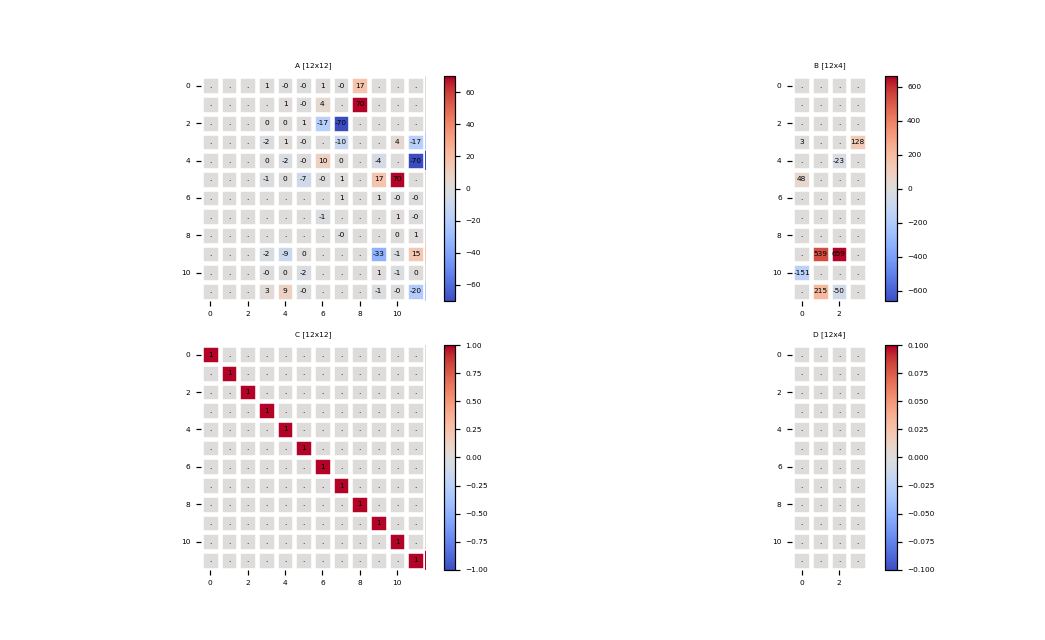

In [9]:
ct.ss_plot(sys, separated_figures=False, abs_values=True)

## Extract pitch/elevator transfer function from transfer matrix

In [6]:
pitch_idx = 7
elevator_idx = 0
pitch_elevator_tf = G[7,0]
pitch_elevator_tf


            -151.3 s^9 - 9693 s^8 - 2.941e+05 s^7 - 5.86e+06 s^6 - 3.732e+07 s^5 - 5.168e+07 s^4 - 1.834e+06 s^3 + 8.11e-06 s^2 - 8.105e-07 s
--------------------------------------------------------------------------------------------------------------------------------------------------------
s^11 + 64.99 s^10 + 2121 s^9 + 4.724e+04 s^8 + 4.636e+05 s^7 + 3.84e+06 s^6 + 6.041e+06 s^5 + 2.25e+06 s^4 + 2.954e+06 s^3 - 3.786e-07 s^2 - 4.166e-07 s

## Balance Reduction of  transfer function

In [7]:
pitch_elevator_red_tf = ct.ss2tf(ct.balred(ct.tf2ss(pitch_elevator_tf), 6))
pitch_elevator_red_tf


-0.06851 s^5 - 149.6 s^4 - 1124 s^3 - 43.29 s^2 + 1.886e-06 s - 1.987e-11
--------------------------------------------------------------------------
s^6 + 8.161 s^5 + 126.2 s^4 + 10 s^3 + 65.79 s^2 + 3.015e-06 s - 1.041e-11

## Nichols plot

<IPython.core.display.Javascript object>


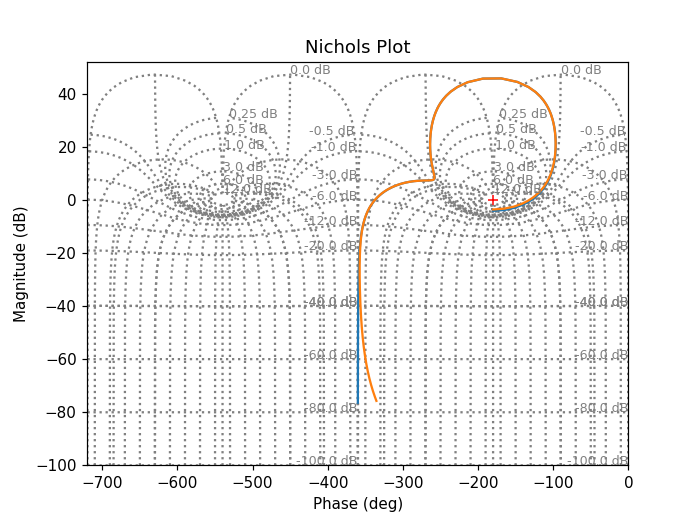

In [8]:
fig = plt.figure()
ct.nichols([pitch_elevator_tf, pitch_elevator_red_tf], omega=np.arange(1e-4, 1e3, 0.01))